In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
from google.colab import files
import shutil
import os

%cd /content
basepath = os.getcwd()

upload_path = os.path.join(basepath, "test_images")
upload_output_path = os.path.join(basepath, "upload_output")

if os.path.isdir(upload_output_path):
    shutil.rmtree(upload_output_path)

if os.path.isdir(upload_path):
    shutil.rmtree(upload_path)

os.mkdir(upload_output_path)
os.mkdir(upload_path)

uploaded = files.upload()
for filename in uploaded.keys():
    shutil.move(os.path.join(basepath, filename), os.path.join(upload_path, filename))

/content


Saving 935.jpg to 935.jpg


In [6]:
import io
import IPython.display
import numpy as np
import PIL.Image

def imshow(a, format='png', jpeg_fallback=True):
    a = np.asarray(a, dtype=np.uint8)
    data = io.BytesIO()
    PIL.Image.fromarray(a).save(data, format)
    im_data = data.getvalue()
    try:
      disp = IPython.display.display(IPython.display.Image(im_data))
    except IOError:
      if jpeg_fallback and format != 'jpeg':
        print(('Warning: image was too large to display in format "{}"; '
              'trying jpeg instead.').format(format))
        return imshow(a, format='jpeg')
      else:
        raise
    return disp

def make_grid(I1, I2, resize=True):
    I1 = np.asarray(I1)
    H, W = I1.shape[0], I1.shape[1]

    if I1.ndim >= 3:
        I2 = np.asarray(I2.resize((W,H)))
        I_combine = np.zeros((H,W*2,3))
        I_combine[:,:W,:] = I1[:,:,:3]
        I_combine[:,W:,:] = I2[:,:,:3]
    else:
        I2 = np.asarray(I2.resize((W,H)).convert('L'))
        I_combine = np.zeros((H,W*2))
        I_combine[:,:W] = I1[:,:]
        I_combine[:,W:] = I2[:,:]
    I_combine = PIL.Image.fromarray(np.uint8(I_combine))

    W_base = 600
    if resize:
      ratio = W_base / (W*2)
      H_new = int(H * ratio)
      I_combine = I_combine.resize((W_base, H_new), PIL.Image.LANCZOS)

    return I_combine

In [11]:
%cd /content/drive/MyDrive/Bringing-Old-Photos-Back-to-Life
!python Global/test_Elm.py \
  --test_mode Full --Quality_restore \
  --use_v2_degradation \
  --name mapping_quality \
  --label_nc 0 \
  --loadSize 256 \
  --fineSize 256 \
  --no_instance \
  --resize_or_crop crop_only \
  --batchSize 32 \
  --gpu_ids -1 \
  --nThreads 4 \
  --n_downsample_global 3 \
  --mc 64 --k_size 4 \
  --start_r 1 --mapping_n_block 6 \
  --map_mc 512 \
  --which_epoch latest \
  --load_pretrainA "/content/drive/MyDrive/Bringing-Old-Photos-Back-to-Life/checkpoints/domainA_SR_old_photos" \
  --load_pretrainB "/content/drive/MyDrive/Bringing-Old-Photos-Back-to-Life/checkpoints/domainB_old_photos" \
  --checkpoints_dir "/content/drive/MyDrive/Bringing-Old-Photos-Back-to-Life/checkpoints/" \
  --test_input "/content/test_images" \
  --outputs_dir "/content/upload_output"

/content/drive/MyDrive/Bringing-Old-Photos-Back-to-Life
Mapping: You are using the mapping model without global restoration.
Now you are processing 935.jpg


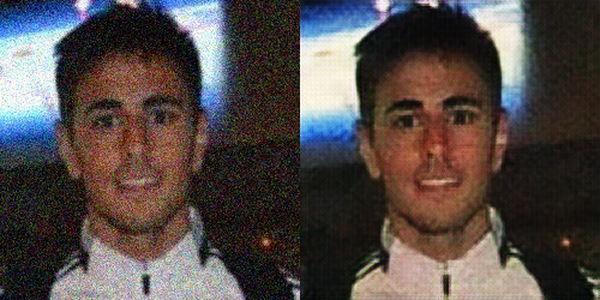

In [12]:
filenames_upload = os.listdir(os.path.join(upload_path))
filenames_upload.sort()

filenames_upload_output = os.listdir(os.path.join(upload_output_path, "restored_image"))
filenames_upload_output.sort()

for filename, filename_output in zip(filenames_upload, filenames_upload_output):
    image_original = PIL.Image.open(os.path.join(upload_path, filename))
    image_restore = PIL.Image.open(os.path.join(upload_output_path, "restored_image", filename_output))

    display(make_grid(image_original, image_restore))
    print("")